<a href="https://colab.research.google.com/github/ahmed-yasser1/Game-Application-Success-Prediction/blob/main/game_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("F:\Gam3a lecs\Machine\games-regression-dataset.csv")
data.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",6/3/2018,31/07/2019,4.0
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",21/03/2013,28/06/2017,3.5
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",4/4/2013,21/04/2015,4.5
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",26/05/2011,23/07/2019,3.5
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",19/05/2017,6/2/2019,4.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5214 entries, 0 to 5213
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           5214 non-null   object 
 1   ID                            5214 non-null   int64  
 2   Name                          5214 non-null   object 
 3   Subtitle                      1465 non-null   object 
 4   Icon URL                      5214 non-null   object 
 5   User Rating Count             5214 non-null   int64  
 6   Price                         5214 non-null   float64
 7   In-app Purchases              3175 non-null   object 
 8   Description                   5214 non-null   object 
 9   Developer                     5214 non-null   object 
 10  Age Rating                    5214 non-null   object 
 11  Languages                     5203 non-null   object 
 12  Size                          5214 non-null   int64  
 13  Pri

In [ ]:
data.shape

(5214, 18)

In [ ]:
data.describe()

,ID,User Rating Count,Price,Size,Average User Rating
count,5.214000e+03,5.214000e+03,5214.000000,5.214000e+03,5214.000000
mean,8.679120e+08,3.669878e+03,0.602551,1.379577e+08,4.032988
std,2.941461e+08,4.977621e+04,2.551937,2.526826e+08,0.751854
min,2.849214e+08,5.000000e+00,0.000000,2.158400e+05,1.000000
25%,5.954790e+08,1.300000e+01,0.000000,2.751732e+07,3.500000
50%,9.194275e+08,4.900000e+01,0.000000,6.740582e+07,4.000000
75%,1.114815e+09,3.320000e+02,0.000000,1.592689e+08,4.500000
max,1.341837e+09,3.032734e+06,139.990000,4.005591e+09,5.000000


In [ ]:
data.isnull().sum().sort_values(ascending=False)

Subtitle                        3749
In-app Purchases                2039
Languages                         11
URL                                0
Age Rating                         0
Current Version Release Date       0
Original Release Date              0
Genres                             0
Primary Genre                      0
Size                               0
Developer                          0
ID                                 0
Description                        0
Price                              0
User Rating Count                  0
Icon URL                           0
Name                               0
Average User Rating                0
dtype: int64

In [ ]:
data.drop(['Subtitle','In-app Purchases'],axis=1,inplace=True)

In [ ]:
data['Languages'].fillna(data['Languages'].mode()[0], inplace=True)

In [ ]:
data.duplicated().sum()
#remove them

43

In [ ]:
data.drop_duplicates(inplace=True)

# EDA

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average User Rating', ylabel='count'>

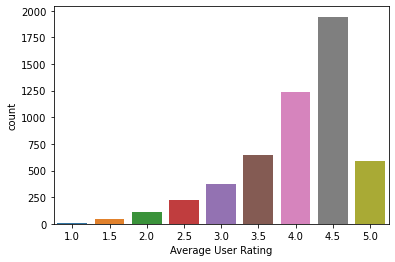

In [ ]:
sns.countplot(data['Average User Rating'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age Rating', ylabel='count'>

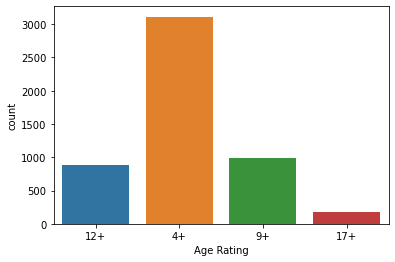

In [ ]:
sns.countplot(data['Age Rating'])

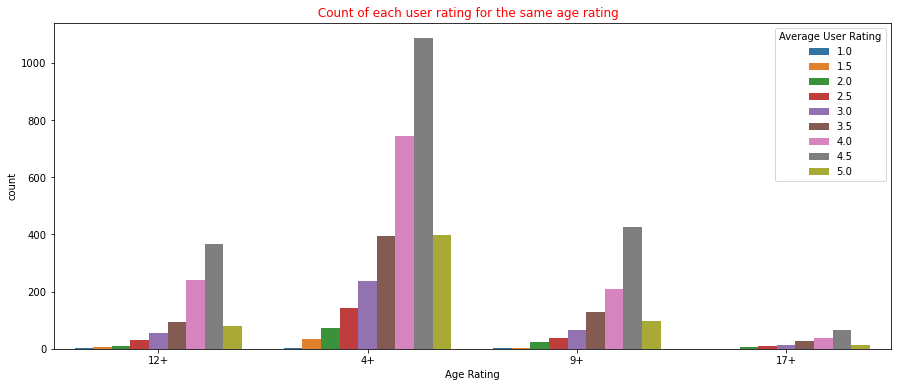

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x ='Age Rating',hue='Average User Rating', data = data)
plt.title(" Count of each user rating for the same age rating   ",color="red");

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

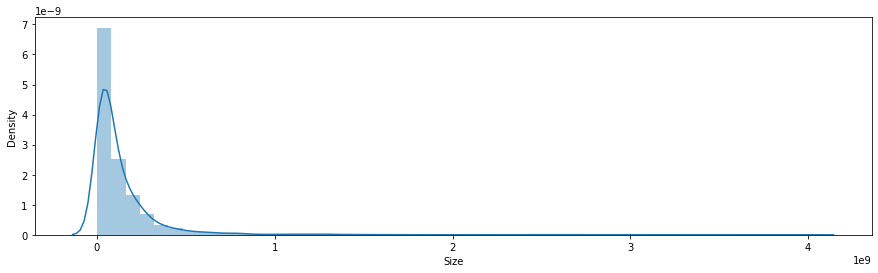

In [ ]:
plt.figure(figsize=(15,4))
sns.distplot(data['Size'])

In [ ]:
Q1 = data['Size'].quantile(0.25)
Q3 = data['Size'].quantile(0.75)

x1=data[data['Size']<Q1]
x2=data[(data['Size']>Q1) & (data['Size']<Q3)]
x3=data[data['Size']>Q3]


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


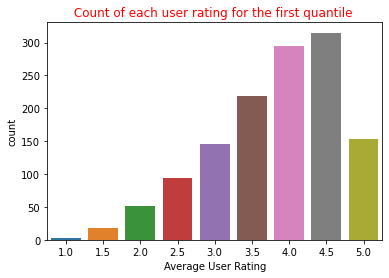

In [ ]:
sns.countplot(x1['Average User Rating'])
plt.title(" Count of each user rating for the first quantile  ",color="red");

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


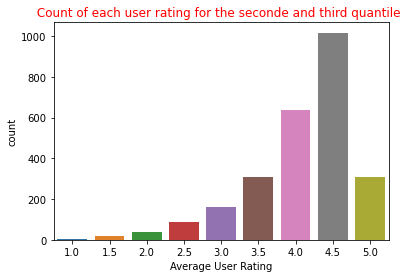

In [ ]:
sns.countplot(x2['Average User Rating'])
plt.title(" Count of each user rating for the seconde and third quantile  ",color="red");

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


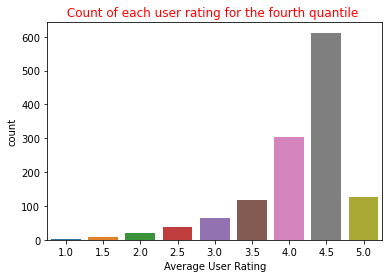

In [ ]:
sns.countplot(x3['Average User Rating'])
plt.title(" Count of each user rating for the fourth quantile  ",color="red");

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

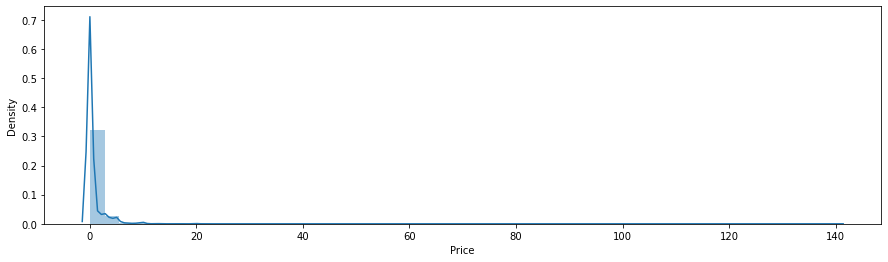

In [ ]:
plt.figure(figsize=(15,4))
sns.distplot(data['Price'])

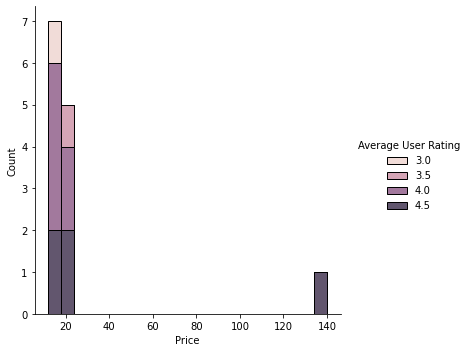

In [ ]:
u=data[data['Price']>10]
sns.displot(data=u, x="Price", hue="Average User Rating", multiple="stack")

In [ ]:
len(u)

13

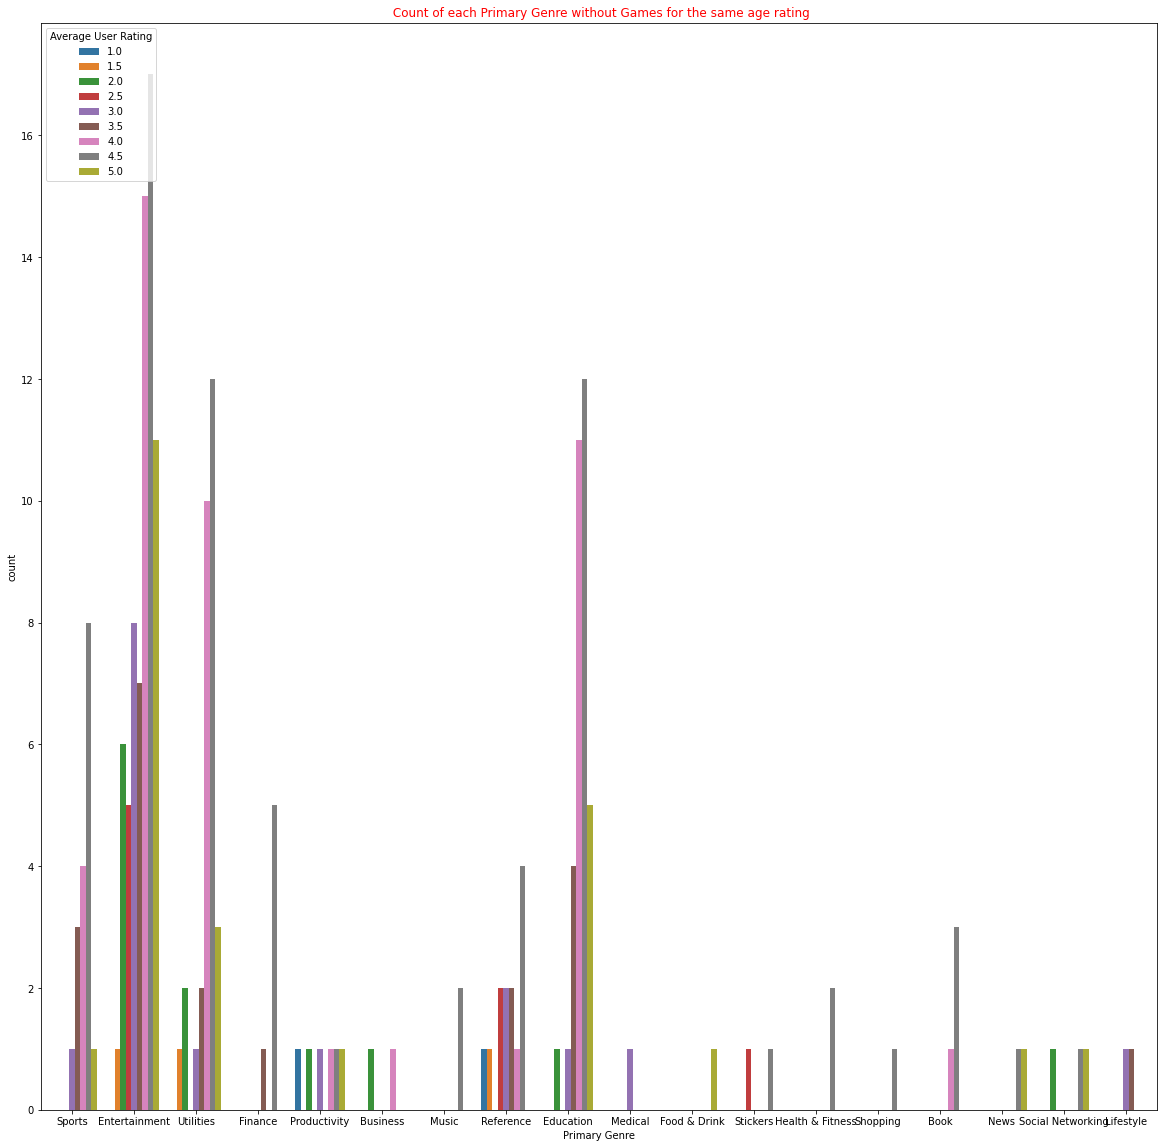

In [ ]:
plt.figure(figsize=(20,20))
u=data.loc[(data["Primary Genre"]!='Games')]

ax = sns.countplot(x ='Primary Genre',hue='Average User Rating', data = u)
plt.title(" Count of each Primary Genre without Games for the same age rating",color="red");

In [ ]:
len(u)

199

In [ ]:
# data['Original Release Date']=pd.to_datetime(data["Original Release Date"], dayfirst=True)
# data['Current Version Release Date']=pd.to_datetime(data["Current Version Release Date"], dayfirst=True)

# data['Original Release Year']=data['Original Release Date'].dt.year
# data['Current Version Release Year']=data['Current Version Release Date'].dt.year


# data.drop(['Original Release Date','Current Version Release Date'],axis=1,inplace=True)
#  plt.figure(figsize=(15,10))
# ax = sns.countplot(x ='Original Release Year',hue='Average User Rating', data = data)
# plt.title(" User Rating for each year   ",color="red");

In [ ]:
data['Original Release Date'] = pd.to_datetime(data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
data['Current Version Release Date'] = pd.to_datetime(data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')

C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_8892/2221242152.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data['Original Release Date'] = pd.to_datetime(data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_8892/2221242152.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data['Current Version Release Date'] = pd.to_datetime(data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')


In [ ]:
data['Age Rating']=data['Age Rating'].str.replace('+', '')
data['Age Rating']=data['Age Rating'].apply(pd.to_numeric)
data['Age Rating']

C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_8892/333452909.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Age Rating']=data['Age Rating'].str.replace('+', '')


0       12
1       12
2        4
3        9
4       12
        ..
5209    12
5210     4
5211     4
5212     9
5213     4
Name: Age Rating, Length: 5171, dtype: int64

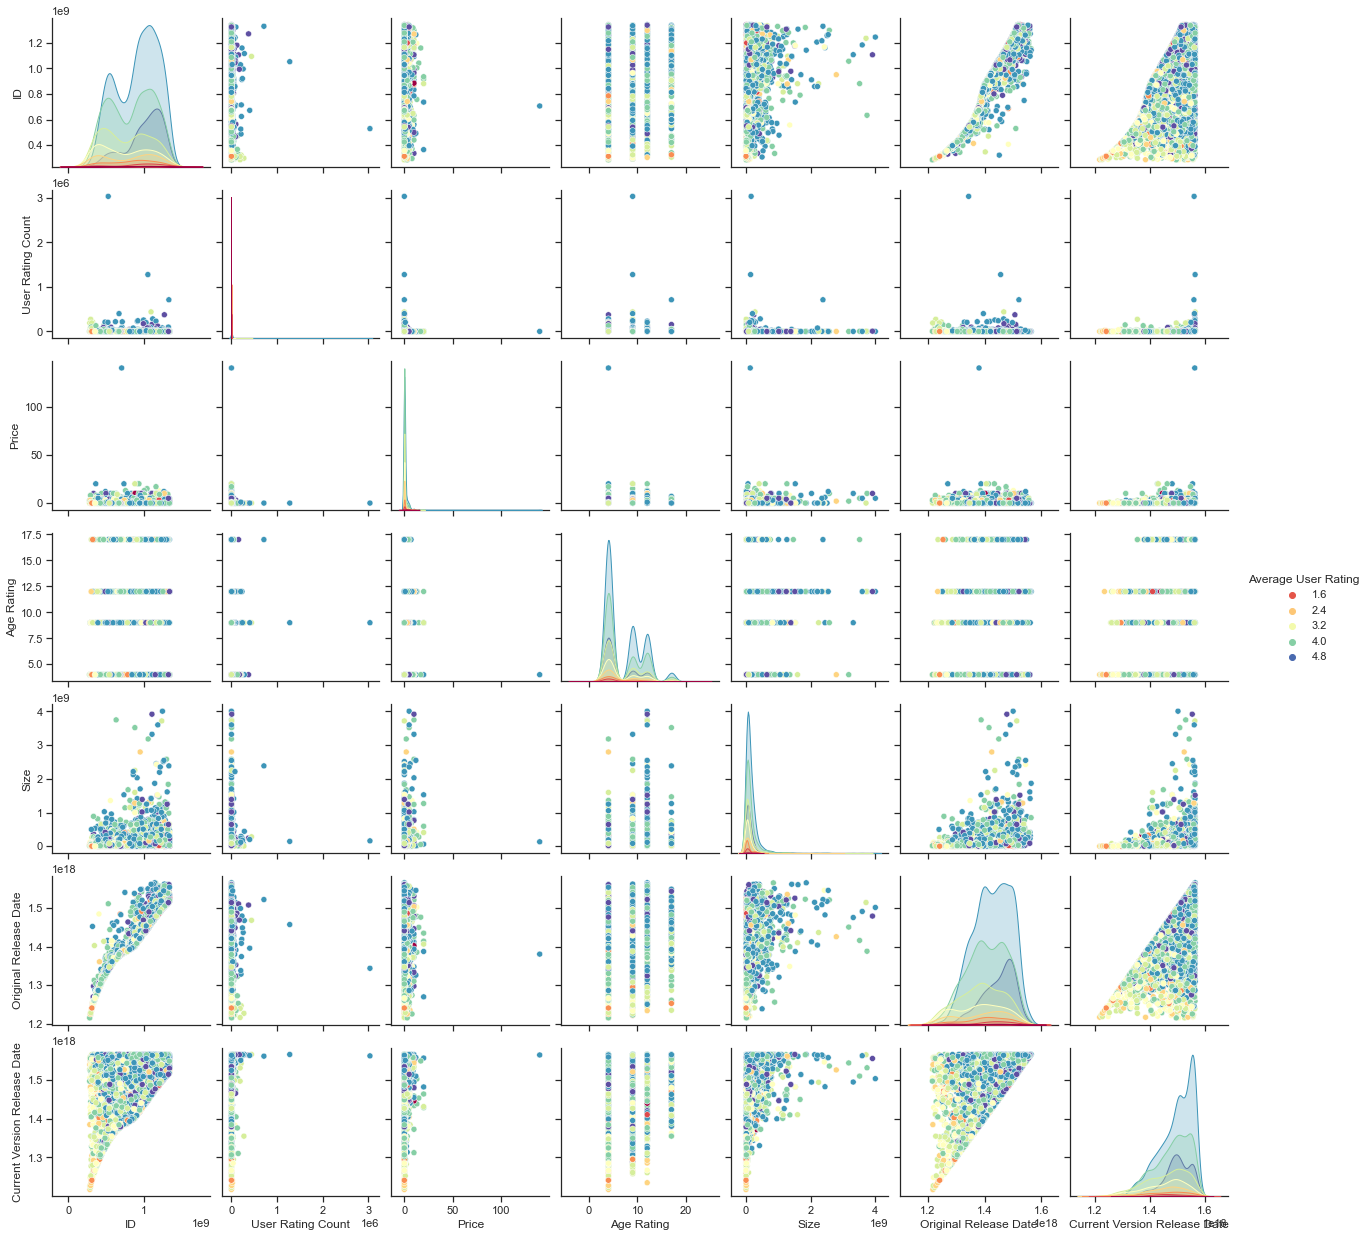

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(data, hue="Average User Rating",palette="Spectral")

<AxesSubplot:>

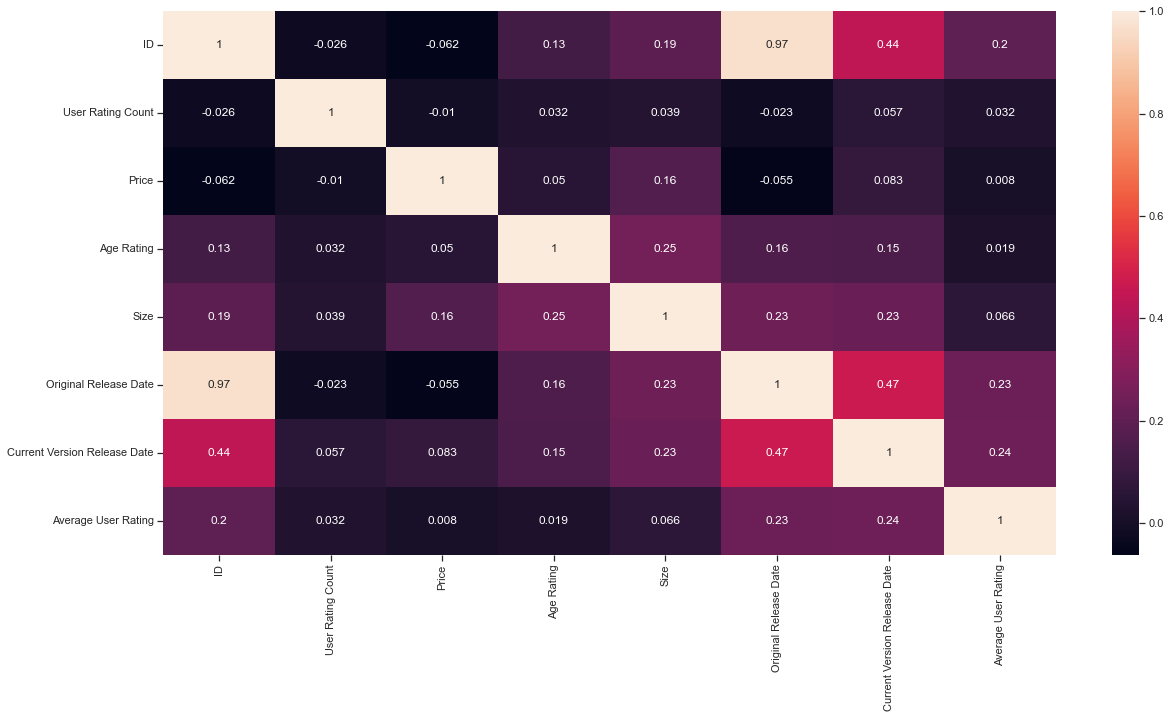

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data['Developer'].value_counts()

Tapps Tecnologia da Informa\xe7\xe3o Ltda.    94
Detention Apps                                32
HexWar Games Ltd                              27
EASY Inc.                                     26
Qumaron                                       26
                                              ..
N3TWORK Inc.                                   1
Freyr Games                                    1
Joseph Lee                                     1
Forgamer LCC                                   1
Supervillain Studios                           1
Name: Developer, Length: 3084, dtype: int64

In [ ]:
data['Name'].is_unique

True

In [ ]:
data['ID'].is_unique

True

In [ ]:
data['URL'].is_unique

True

In [ ]:
data['Icon URL'].is_unique

True

In [ ]:
data['Rating']=data['Average User Rating']
data['Primary']=data['Primary Genre']


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Rating ~ Developer', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Developer,2321.402389,3083.0,2.655623,1.349218e-119
Residual,591.742650,2087.0,NaN,NaN


In [ ]:
model = ols('Rating ~ Primary', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Primary,25.308306,18.0,2.508383,0.000411
Residual,2887.836733,5152.0,NaN,NaN


In [ ]:
model = ols('Rating ~ Languages', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Languages,325.837716,579.0,0.998578,0.502661
Residual,2587.307324,4591.0,NaN,NaN


In [ ]:
model = ols('Rating ~ Genres', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Genres,343.208416,506.0,1.230959,0.000587
Residual,2569.936623,4664.0,NaN,NaN


In [ ]:
data.drop(['URL','Icon URL','Name','ID','Description','Languages','Rating','Primary','User Rating Count','Price','Age Rating','Size'],axis=1,inplace=True)
#data.drop(['URL','Icon URL','Name','ID','Description','Languages'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 0 to 5213
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Developer                     5171 non-null   object 
 1   Primary Genre                 5171 non-null   object 
 2   Genres                        5171 non-null   object 
 3   Original Release Date         5171 non-null   int64  
 4   Current Version Release Date  5171 non-null   int64  
 5   Average User Rating           5171 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 411.8+ KB


In [ ]:
dumies1=pd.get_dummies(data['Developer'])
dumies2=pd.get_dummies(data['Primary Genre'])

dumies3=data['Genres'].str.get_dummies(sep=",")
#dumies4=data['Languages'].str.get_dummies(sep=",")

data=data.drop(['Developer'],axis=1)
data=data.drop(['Primary Genre'],axis=1)
data=data.drop(['Genres'],axis=1)
#data=data.drop(['Languages'],axis=1)


In [ ]:
data=pd.concat([data,dumies1],axis='columns')
data=pd.concat([data,dumies2],axis='columns')
data=pd.concat([data,dumies3],axis='columns')
#data=pd.concat([data,dumies4],axis='columns')

In [ ]:
data.shape

(5171, 3162)

In [ ]:
#data.reset_index(drop=True, inplace=True)

In [ ]:
X=data.drop('Average User Rating',axis=1)
y=data['Average User Rating']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=2)

In [ ]:
train_data=pd.concat([X_train,y_train],axis='columns')

In [ ]:
from sklearn.ensemble import IsolationForest

model_IF = IsolationForest(contamination=float(0.1))
model_IF.fit(train_data)

D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1)

In [ ]:
train_data['anomaly'] = model_IF.predict(train_data)
#train_data['anomaly_scores'] = model_IF.decision_function(train_data)


In [ ]:
# anomaly=train_data.loc[train_data['anomaly']==-1]
# anomaly_index=list(anomaly.index)
# print(anomaly)

In [ ]:
data_without_outliers=train_data.loc[train_data['anomaly']!=-1]

In [ ]:
X_train=data_without_outliers.drop(['Average User Rating','anomaly'],axis=1)
y_train=data_without_outliers['Average User Rating']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)